In [3]:
import pandas as pd
import numpy  as np
import sklearn # 機械学習ライブラリ
from sklearn import linear_model # 線形モデル関係
import statsmodels.api as smf # 統計量計算
import matplotlib.pyplot as plt # 描画ライブラリ
import seaborn as sns # 描画ライブラリ

In [4]:
# まずはデータの読み込みから
# 行情報 : スイスの 47 自治体の名前
# 列情報
# Fertility : 出生率
# Agriculture : 男性労働者のうち農業従事者の割合
# Examination : 軍の試験で最高レベルで合格したその地域の出身者の数
# Education : 被徴兵者の小学校以上の学歴
# Catholic : カトリック教徒の割合
# Infant.Mortality : 1 歳未満の幼児死亡率

swiss = pd.read_csv('csv_data/swiss.csv',index_col = 0)
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [10]:
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
swiss_new = swiss.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
swiss_new
# 説明変数に "Fertlity (出生率スコア以外すべて)" を利用
swiss_new_except_Fertility = swiss_new.drop("Fertility", axis=1)
X = swiss_new_except_Fertility.values  #valuesを出すとエラーが出る
 
# 目的変数に "Fertility (出生率)" を利用
Y = swiss_new['Fertility'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":swiss_new_except_Fertility.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

               Name  Coefficients
1       Examination      0.152561
3          Catholic      0.177177
0       Agriculture      0.264906
4  Infant.Mortality      0.295954
2         Education      0.787633
3.7334193350232017e-16


In [7]:
# X　Y　は上と同じデータを使用している
model = smf.OLS(Y,X) 
# 上記では係数、切片のみを計算しているのに対して、こちらは様々な統計量も計算している
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              20.24
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    3.13e-10
Time:                        10:12:10   Log-Likelihood:                          34.398
No. Observations:                  47   AIC:                                     -58.80
Df Residuals:                      42   BIC:                                     -49.55
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2649      0.107     -2.478      0.017      -0.481      -0.049
x2            -0.1526      0.148     -1.029      0.310      -0.452       0.147
x3            -0.7876      0.164     -4.816      0.000      -1.118      -0.458
x4             0.1772      0.059      2.989      0.005       0.058       0.297
x5             0.2960      0.104      2.856      0.007       0.087       0.505
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
swiss_new_Fertility = swiss.drop(["Examination","Fertility"],axis = 1)
X = swiss_new_Fertility.values

# X　Y　は上と同じデータを使用している
model = smf.OLS(Y,X) 
# 上記では係数、切片のみを計算しているのに対して、こちらは様々な統計量も計算している
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              24.42
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.36e-10
Time:                        10:12:13   Log-Likelihood:                          33.425
No. Observations:                  47   AIC:                                     -58.85
Df Residuals:                      43   BIC:                                     -51.45
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0033      0.001     -3.547      0.001      -0.005      -0.001
x2            -0.0182      0.002     -8.553      0.000      -0.023      -0.014
x3             0.0023      0.000      4.722      0.000       0.001       0.003
x4             0.0138      0.003      4.564      0.000       0.008       0.020
==============================================================================
Omnibus:                        0.273   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.463
Skew:                           0.044   Prob(JB):                        0.793
Kurtosis:                       2.522   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:title={'center':'swissデータの相関行列'}>

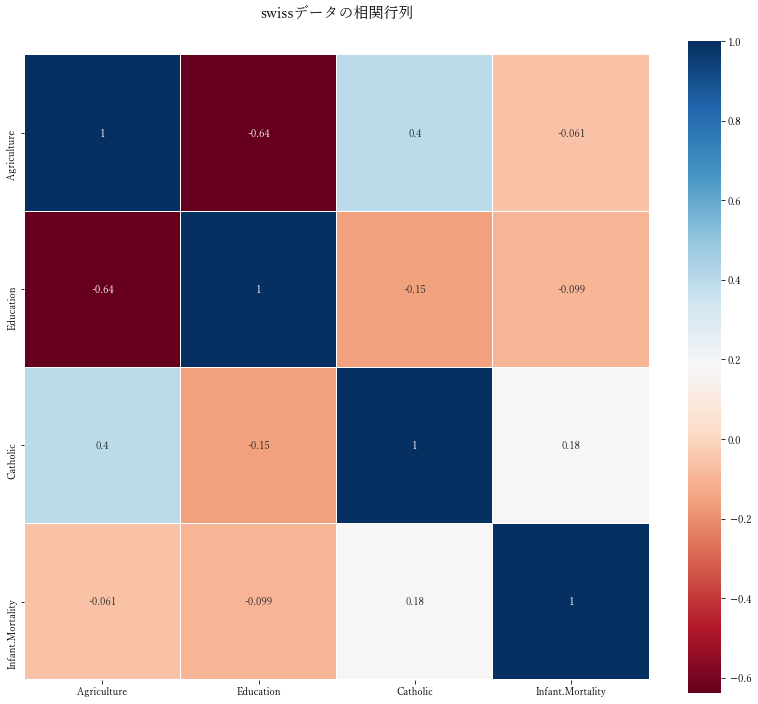

In [9]:
# カラーマップの設定
colormap = plt.cm.RdBu
# フォントの設定
plt.rcParams['font.family'] = 'Yu Mincho'
# 描画サイズの設定
plt.figure(figsize=(14,12))
# タイトル
plt.title('swissデータの相関行列', y=1.05, size=15)
# ヒートマップの描画
sns.heatmap(swiss_new_Fertility.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)